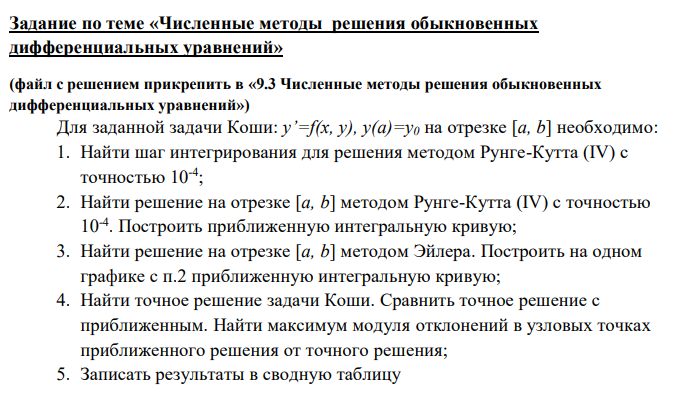
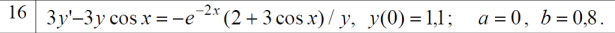

Преобразуем исходное уравнение, перекинув все в правую сторону, и вопользуемся методом Рунге-Кутта для нахождения шага:

In [5]:
from math import cos, exp

# ==== Исходные данные ====
a, b = 0.0, 0.8
y0 = 1.1
eps = 1e-4 # Требуемая точность
p = 4 # Порядок метода Рунге–Кутты

# ==== Правая часть ====
def f(x, y):
    return y * cos(x) - exp(-2 * x) * (2 + 3 * cos(x)) / (3 *y)

# ==== Шаг Рунге–Кутты 4-го порядка ====
def rk4(x, y, h):
    k1 = f(x, y)
    k2 = f(x + h / 2, y + h * k1 / 2)
    k3 = f(x + h / 2, y + h * k2 / 2)
    k4 = f(x + h,   y + h * k3)
    return y + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

# ==== Решение на всём отрезке [a,b] ====
def solve(a, b, y0, h):
    x, y = a, y0
    while x < b - 1e-12:
        y = rk4(x, y, h)
        x += h
    return y  # возвращаем значение в конце отрезка

# ==== Подбор шага ====
h = 0.8  # начнем с крупного шага

while True:
    y_h  = solve(a, b, y0, h)
    y_h2 = solve(a, b, y0, h / 2)
    Eh = abs(y_h2 - y_h) / (2 ** p - 1)  # правило Рунге
    print(f"h = {h:.4f}, погрешность ≈ {Eh:.2e}")
    if Eh <= eps:
        print(f"\nПодходящий шаг найден: h = {h:.4f}")
        break
    h /= 2

h = 0.8000, погрешность ≈ 2.17e-03
h = 0.4000, погрешность ≈ 2.81e-04
h = 0.2000, погрешность ≈ 2.41e-05

Подходящий шаг найден: h = 0.2000
